# Examen 02

Metodos Computacionales

Profesor: Hernan David Salinas Jimenez

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import scipy.misc as scm
import sympy as sy

### Integracion 
1. (33%) I) The period of a pendulum of length l oscillating at a large angle $\alpha$ is given by
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
where
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
is the period of the same pendulum at small amplitudes. Any numerical evaluation of the integral as is would fail (explain why). If we change the variable by writing:
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
we can get:
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
which is a well-behaved integral. Write a program to use the above integral to calculate the ratio $T/T_0$ for integral amplitudes $0^\circ \le\alpha \le 90^\circ$. Output these values as a pandas dataframe showing the amplitude in degrees and radians as well as $T/T_0$, and make a plot with the two columns. Explain the result when $\alpha = 0.$ 

**Respuesta 1:** Si queremos evaluar numéricamente la primer integral esta fallaría debido a que existe una singularidad cuando evaluamos la función a integrar en el valor de $\alpha$, puesto que el denominador nos quedaría valiendo 0 en el punto final del intervalo.

In [72]:
# Consideremos entonces la función dada en la segunda integral al realizar el cambio de variable.

al, fi = sy.symbols('𝛼 𝜙')

def f_fi(al,fi): #Escrita en términos de senos
    return 1/np.sqrt(1 - (np.sin(al/2))**2 * (np.sin(fi))**2 )

In [73]:
# Usemos la integración numérica por método de Simpson para una cantidad de 15 alphas diferentes

aldeg = np.linspace(0,90,15)
alrad = np.pi/180 * aldeg
len(alrad)

15

In [74]:
import scipy.integrate as scin

# Escribamos el arreglo de valores de fi sobre el que vamos a trabajar
# Consideremos los vectores fila como cada valor asociado


Fi = np.linspace(0,np.pi/2,100)
FFial = np.zeros((100,15)) 
FFial = np.matrix(FFial)
FFial

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
for i in range(15):
    for j in range(100):
        FFial[j,i] = f_fi(alrad[i],Fi[j]) 
FFial

matrix([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [1.        , 1.0000004 , 1.00000158, ..., 1.00004893, 1.00005589,
         1.00006294],
        [1.        , 1.00000158, 1.00000631, ..., 1.00019572, 1.00022356,
         1.00025176],
        ...,
        [1.        , 1.00157407, 1.00632115, ..., 1.27863878, 1.34058711,
         1.41350228],
        [1.        , 1.00157527, 1.00632597, ..., 1.27894564, 1.34099109,
         1.4140356 ],
        [1.        , 1.00157566, 1.00632758, ..., 1.27904801, 1.34112587,
         1.41421356]])

In [76]:
TT0al = np.zeros(15)
TT0al

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [77]:
N = np.array(np.transpose(FFial[:,0]))
N[0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [78]:
for k in range(15):
    TT0al[k] = 2/np.pi * scin.simpson( np.array(np.transpose(FFial[:,k])),Fi )
    
TT0al

array([1.        , 1.00078737, 1.0031563 , 1.0071275 , 1.012736  ,
       1.02003212, 1.02908279, 1.03997334, 1.05280999, 1.06772305,
       1.08487113, 1.10444668, 1.12668323, 1.1518651 , 1.1803405 ])

In [79]:
import pandas as pd

RelTT0 = pd.DataFrame({'Alpha_degradientes':aldeg,'Alpha_radianes':alrad,'Relación T/T0':TT0al})
RelTT0

,Alpha_degradientes,Alpha_radianes,Relación T/T0
0,0.000000,0.000000,1.000000
1,6.428571,0.112200,1.000787
2,12.857143,0.224399,1.003156
3,19.285714,0.336599,1.007127
4,25.714286,0.448799,1.012736
5,32.142857,0.560999,1.020032
6,38.571429,0.673198,1.029083
7,45.000000,0.785398,1.039973
8,51.428571,0.897598,1.052810
9,57.857143,1.009798,1.067723


Text(0, 0.5, 'Relación $T/T_0$')

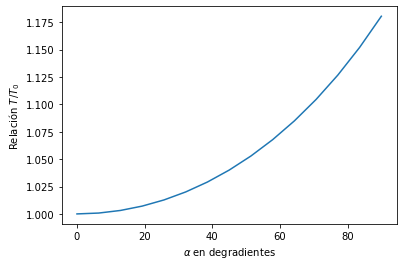

In [80]:
plt.plot(aldeg,TT0al)
plt.xlabel(r'$\alpha$ en degradientes')
plt.ylabel(r'Relación $T/T_0$')

### Derivación 
2. En el siguiente link ([datos_pendulo](https://github.com/hernansalinas/Curso_Metodos_Computacionales/tree/main/Entregas/Parciales/Parcial2/dataset)), se encuentran  datos experimentales de un péndulo simple tomadas a través de una cámara web y procesados con el programa [kinovea](https://www.kinovea.org/). Dados los datos en formato csv,  construir un programa que realice lo siguiente: 

- a. Leer el archivo csv a través de un Data Frame de Pandas, las columnas del data frame deberan ser:

col=["Tiempo[ms]", "AnguloDeg", "AnguloRad"]

- b. Construya una grafica de :
plt.plot(df['Tiempo[ms]'], df['AnguloDeg'],"b-")

¿Qué puede concluir respecto al movimiento del pendulo?

- c. Realice un gráfico de la rapidez angular como funcion del tiempo medio.$\frac{\mathrm{d}\theta}{\mathrm{d}t}$

- d. realice un grafico de la  aceleración angular como funcion del tiempo medio  $\frac{\mathrm{d^2}\theta}{\mathrm{d}t^2}$

In [83]:
# Importemos el Dataset

Angles = pd.read_csv('Pendulo_simple.csv',sep=';')
pi = np.pi
Angles

,Tiempo (ms),Ángulo 1
0,9,"59,0289611816406"
1,42,"59,9823265075684"
2,75,"61,2374534606934"
3,108,"63,0049247741699"
4,142,"65,3887710571289"
...,...,...
2842,94709,"94,9375762939453"
2843,94743,"96,479850769043"
2844,94776,"97,9406890869141"
2845,94809,"99,3180923461914"


### No aparecieron las tres columnas

In [139]:
Angles['Ángulo Radianes'] = (Angles['Ángulo 1']*pi)/180

TypeError: can't multiply sequence by non-int of type 'float'

Bonus 

Calcule la transformada de fourier de los datos obtenidos, para encontrar la frecuencia de oscilacion del sistema, para ello realice lo siguiente:

- importe la librerias de scipy fft, fftfreq.
- Aplique la transformada de fourier como sigue:

```
tf = fft(df['AnguloRad'].values)
T = 33E-3 #Paso del tiempo
N = len(df['Tiempo[ms]'])
xf = fftfreq(N, T)[:N//2]

plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0, 2)

```

-  Para las valores en el eje x y eje y de la anterior gráfica, realice una interpolación. 

- Encuentre el valor máximo de frecuencia

$\lambda$

### Matrices: Rotación  en el plano, autovalores y autovectores
3.   Considere la siguiente matrix de rotación:
\begin{bmatrix} 
1 & 0 &0\\
0&\cos \theta & -\sin \theta\\ 
0&\sin \theta & \cos \theta
\end{bmatrix}

a) Encontrar el polinomio característico de A

b) Encontrar los autovalores y autovectores

c) construya la matriz diagonal con los autovalores y autovectores y compruebe su solución. 

Encontrar los autovalores y autovectores para $\theta=45$.

In [135]:
import sympy as sy
import scipy.linalg as lin
sy.init_printing()

th,lmb = sy.symbols('𝜃 𝜆')
A1 = np.array([[1,0,0],[0,sy.cos(th),-1*sy.sin(th)],[0,sy.sin(th),sy.cos(th)]])
A1 = sy.Matrix(A1)

In [136]:
vals = A1.eigenvals()
vals

In [138]:
vects = A1.eigenvects()
vects

⎡               ⎛                                             ⎡⎡       0      
⎢               ⎜                                             ⎢⎢              
⎢⎛      ⎡⎡1⎤⎤⎞  ⎜                                             ⎢⎢     sin(𝜃)   
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜    ___________________________              ⎢⎢──────────────
⎢⎜1, 1, ⎢⎢0⎥⎥⎟, ⎜- ╲╱ (cos(𝜃) - 1)⋅(cos(𝜃) + 1)  + cos(𝜃), 1, ⎢⎢   ___________
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜                                             ⎢⎢  ╱    2      
⎢⎝      ⎣⎣0⎦⎦⎠  ⎜                                             ⎢⎢╲╱  cos (𝜃) - 
⎢               ⎜                                             ⎢⎢              
⎣               ⎝                                             ⎣⎣       1      

  ⎤⎤⎞  ⎛                                           ⎡⎡       0        ⎤⎤⎞⎤
  ⎥⎥⎟  ⎜                                           ⎢⎢                ⎥⎥⎟⎥
  ⎥⎥⎟  ⎜                                           ⎢⎢    -sin(𝜃)     ⎥⎥⎟⎥
──⎥⎥⎟  ⎜  ___________________________              ⎢⎢─────────────

In [97]:
I = np.identity(3)
I1 = sy.Matrix(I)
I1

Matrix([
[1.0,   0,   0],
[  0, 1.0,   0],
[  0,   0, 1.0]])

In [106]:
M = A1 - lmb*I1
M

Matrix([
[1 - 1.0*𝜆,               0,               0],
[        0, -1.0*𝜆 + cos(𝜃),         -sin(𝜃)],
[        0,          sin(𝜃), -1.0*𝜆 + cos(𝜃)]])

In [107]:
polyA = M.det()
polyA

-1.0*𝜆**3 + 2.0*𝜆**2*cos(𝜃) + 1.0*𝜆**2 - 1.0*𝜆*sin(𝜃)**2 - 1.0*𝜆*cos(𝜃)**2 - 2.0*𝜆*cos(𝜃) + sin(𝜃)**2 + cos(𝜃)**2

In [116]:
sy.factor(polyA)

-2.0*(1.0*𝜆 - 1.0)*(0.5*𝜆**2 - 1.0*𝜆*cos(𝜃) + 0.5*sin(𝜃)**2 + 0.5*cos(𝜃)**2)

In [118]:
EigV = np.array([-2.0, 1.0*lmb - 1.0, 0.5*lmb**2 - 1.0*lmb*sy.cos(th) + 0.5*sy.sin(th)**2 + 0.5*sy.cos(th)**2])

In [121]:
EigV = sy.Matrix(EigV)
EigV

Matrix([
[                                                   -2.0],
[                                            1.0*𝜆 - 1.0],
[0.5*𝜆**2 - 1.0*𝜆*cos(𝜃) + 0.5*sin(𝜃)**2 + 0.5*cos(𝜃)**2]])